In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import scipy
import seaborn as sb

# Data source: https://www.sciencebase.gov/catalog/item/59405353e4b0764e6c631407
df = pd.read_csv("pythons.csv")
df["svl"] = df["svl"] / 100
df["mass"] = df["mass"] / 1000
df.head()

,ID,sex,svl,mass,fat,specimen
0,14Sep14.03,F,0.70,0.186,6.0,FRESH
1,496,M,0.76,0.310,11.0,NaN
2,16Sep14.05,M,0.77,0.260,6.0,FRESH
3,15Sep14.02,M,0.78,0.262,8.0,FRESH
4,13Sep14.02,M,0.81,0.306,4.0,FRESH


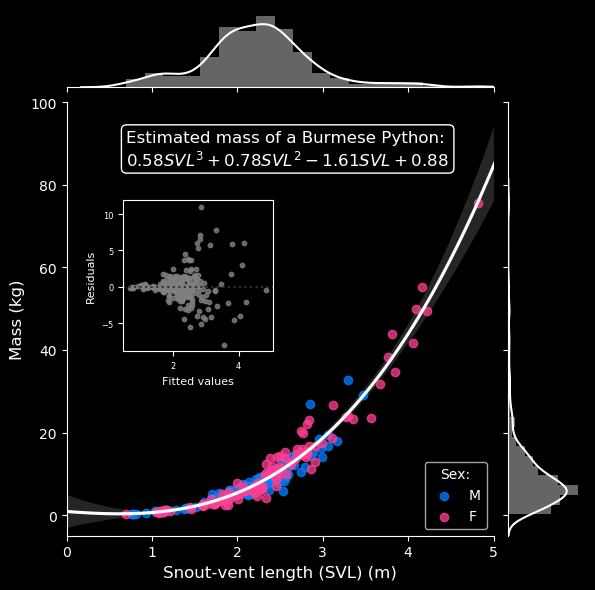

In [35]:
plt.rcdefaults()
plt.style.use("dark_background")
jp = sb.jointplot(data=df, x="svl", y="mass", kind="reg", color="white", order=3, scatter=False)

mdf = df[df["sex"] == "M"]
fdf = df[df["sex"] == "F"]
plt.scatter(mdf["svl"], mdf["mass"], color='#027dff', label="M", alpha=0.75)
plt.scatter(fdf["svl"], fdf["mass"], color='#fd3f92', label="F", alpha=0.75)

plt.xlabel("Snout-vent length (SVL) (m)", fontsize=12)
plt.ylabel("Mass (kg)", fontsize=12)
plt.legend(title="Sex:", loc=4)
plt.ylim(-5, 100)
plt.xlim(0, 5)

cubic, quadratic, linear, intercept = np.round(np.polyfit(x=df["svl"], y=df["mass"], deg=3), 2)
reg_equation = f"Estimated mass of a Burmese Python:\n${cubic}SVL^3 + {quadratic}SVL^2 {linear}SVL + {intercept}$"
plt.annotate(reg_equation, xy=(0.7, 85), fontsize=12, bbox={"boxstyle": "round", "fc": "k", "ec": "w", "lw": 1})

sub_pos = (0.116, 0.1, 1, 1)
sub_axes = inset_axes(jp.ax_joint, width="35%", height="35%", loc=6, bbox_to_anchor=sub_pos, bbox_transform=jp.ax_joint.transAxes)
sb.residplot(data=df, x="svl", y="mass", color="grey", order=3, scatter_kws={"s": 10})
plt.xlabel("Fitted values", fontsize=8)
plt.ylabel("Residuals", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.savefig("pythons.png", figsize=(10, 10), dpi=200)